# DSCI 100 Group Project

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Title:

## Predictive Analysis of Credit Scores: Utilizing Regression Models on Key Financial Metrics

## Intro:

Credit score is an important aspect of banking. Credit score will determine whether you will get approved on a bank loan, mortgage, or line of credit. Credit score can also affect how low your interest rates will be on your loan or how much money a bank will loan you. Credit score is a bank's way of putting a quantitative measure of an individual’s credit risk (likelihood for the individual to pay their bills on time). There are several factors that go into determining a person's credit score. Our proposal is to use real world data from a Kaggle data set, that has all sensitive information removed, to predict a person's credit score using regression analysis using these predictors: tenure, number of products purchased, bank balance, and age.  We have chosen the data set “https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/?select=Customer-Churn-Records.csv”. This data set is called bank customer churn. It has real world data from real clients that records all sorts of information about the client.

Data set Definitions:<br>

Tenure: Number of years an individual has been with the same bank.<br>
NumOfProducts: How many products the client has purchased using the bank’s card.<br>
Age: How old the individual is.<br>
Balance: How much money an individual has in the bank.<br>
CustomerId: Unique string of numbers to identify different clients.<br>
Geography: What country the client is using the bank in.<br>
HasCrCard: If the client has a credit card or not.<br>



# Preliminary Data Analysis

text here

In [5]:
#Code Here
BankData <- read_csv("https://raw.githubusercontent.com/3deiuah/DSCI-100-Group-Project/main/Customer-Churn-Records.csv")
BankNA <- sum(is.na(BankData))
BankNA #No NA values in the data set.
colnames(BankData)[17] <- "CardType"
colnames(BankData)[18] <- "PointEarned"
BankData <- mutate(BankData,CardType = as_factor(CardType))
head(BankData) #Data set loaded into R, Data Set is already Tidy

Rows: 10000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Surname, Geography, Gender, Card Type
dbl (14): RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfPro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 0

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,CardType,PointEarned
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


In [3]:
bank_split <- initial_split(BankData, prop = 0.75, strata = CreditScore)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)

In [4]:

bank_table <- bank_train |> group_by(Geography) |> summarize(BalanceMean = mean(Balance))
counttest <- bank_train |> select(CardType) |> group_by(CardType) |> summarize(CardCount = n())

counttest
bank_table

CardType,CardCount
<fct>,<int>
DIAMOND,1873
GOLD,1918
SILVER,1837
PLATINUM,1870


Geography,BalanceMean
<chr>,<dbl>
France,62916.23
Germany,120122.16
Spain,61597.76


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


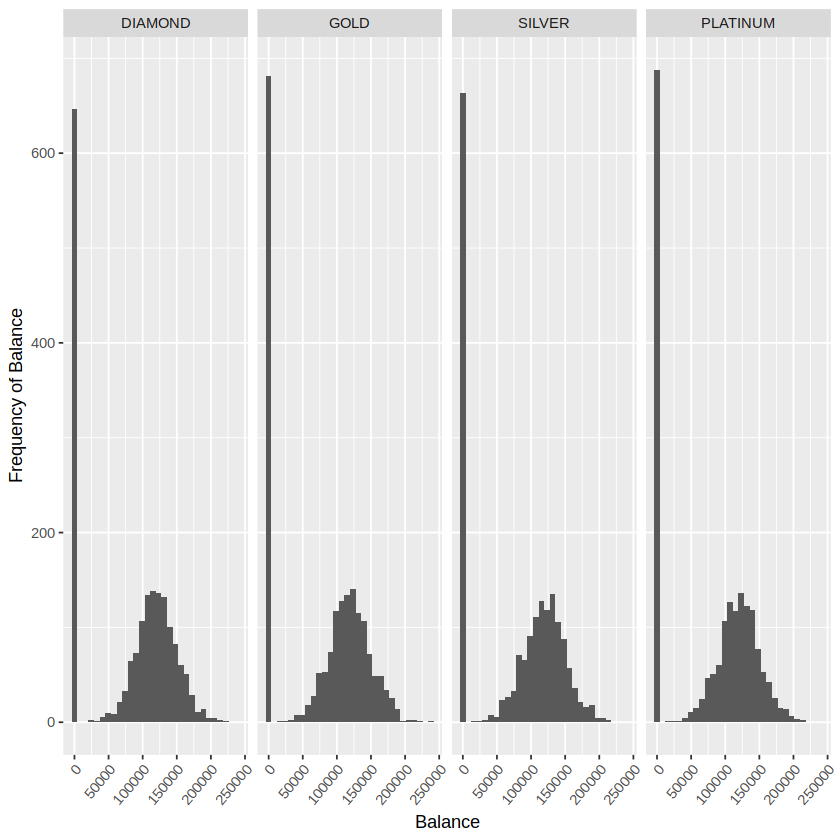

In [10]:
balancePlot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(CardType)) + ylab("Frequency of Balance") + theme(axis.text.x = element_text(angle = 50, hjust = 1))
balancePlot

Balance distributions are approximately equal across all Card Types


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


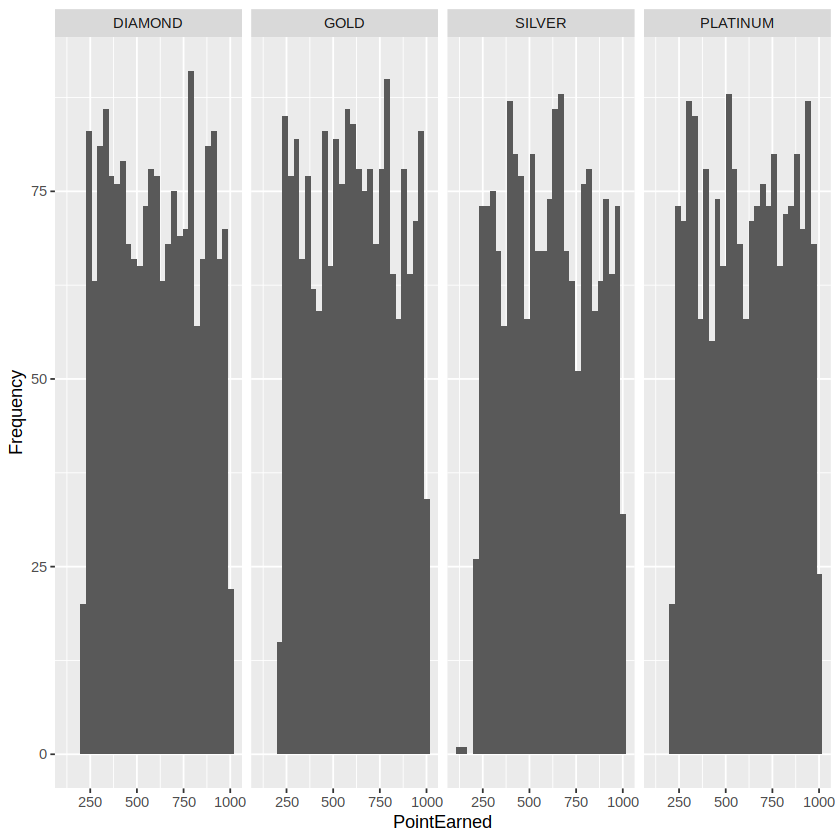

In [6]:
PointPlot <- bank_train |> ggplot(aes(x = PointEarned)) + geom_histogram() + facet_grid(cols = vars(CardType)) + ylab("Frequency")
PointPlot

Point distributions are not equal across all Card Types


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


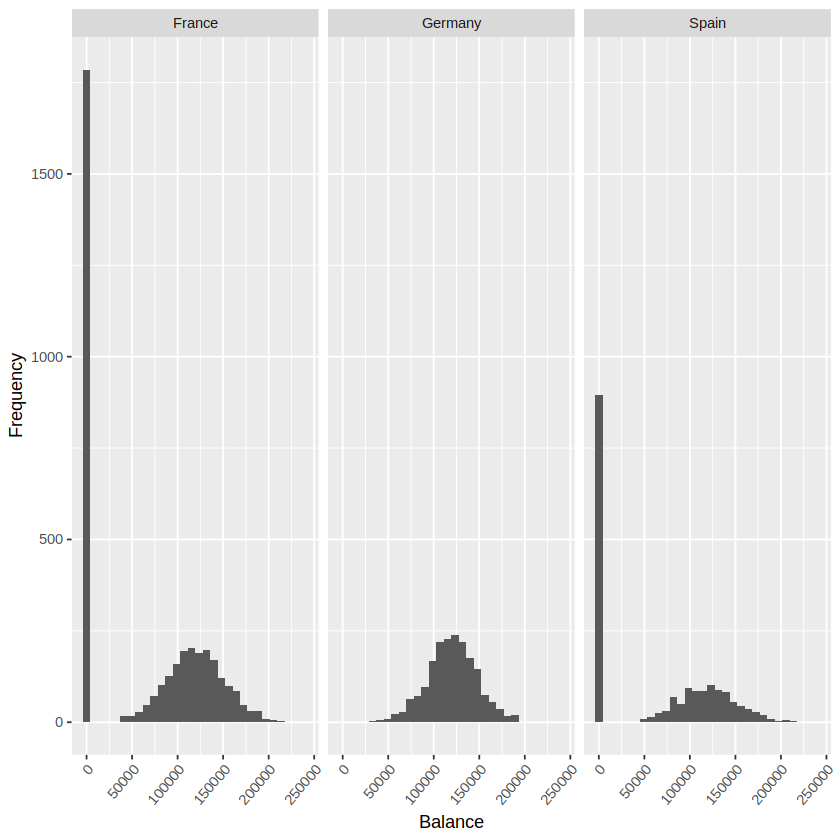

In [9]:
regionplot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(Geography)) + ylab("Frequency") + theme(axis.text.x = element_text(angle = 50, hjust = 1))
regionplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


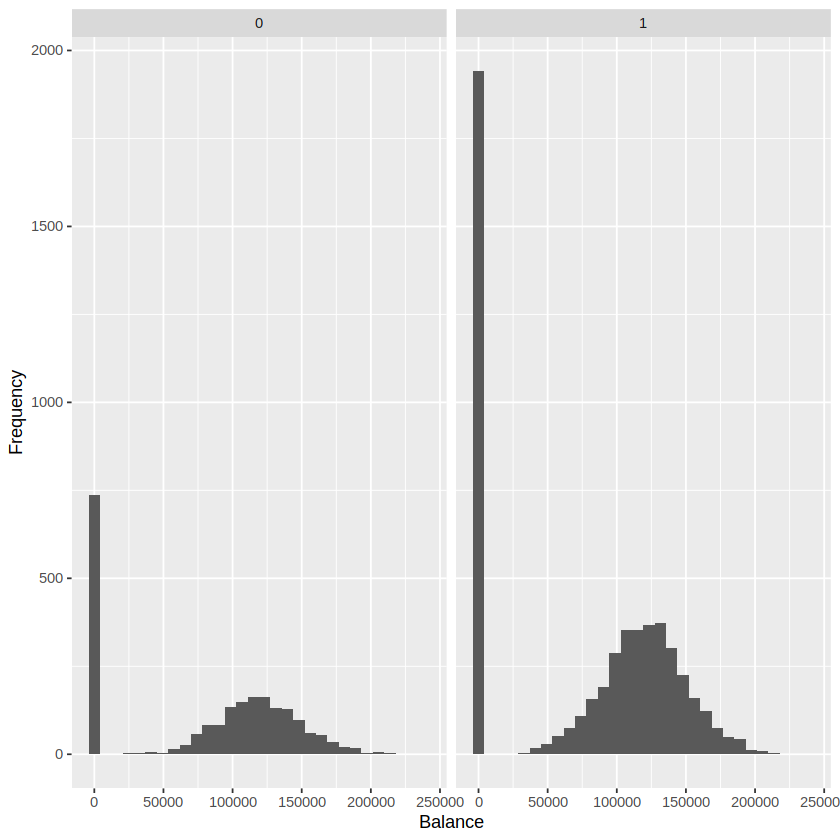

In [8]:
genderplot <- bank_train |> ggplot(aes(x = Balance)) + geom_histogram() + facet_grid(cols = vars(HasCrCard)) + ylab("Frequency")
genderplot

# Methods

To predict a customer’s credit score, we will be using a regression model after filtering and scaling the columns; Bank balance, Number of products purchased, Tenure, and age. We decided not to use columns Surname, Geography, and Gender as we believe that is not relevant to predicting a customer's credit score and could introduce bias into the model. Utilizing non-relevant features can decrease the accuracy of our predictions and may lead to unfair assessments based on demographic factors. Our primary objective is to build a model that is both accurate and free from discriminatory practices, ensuring that all customers are evaluated based on financial behaviors and metrics that genuinely reflect their credit score

# Expected Outcomes and Significance

Using a regression model to predict a customer’s credit score we can see which variables have a larger impact on credit score. This will help consumers find ways to improve their credit scores and prospects of getting approved for a loan. Eg. If age is a major factor, they might consider waiting a few years. It can also help small or new banks see in which order they should evaluate applications for loans as they might not have efficient systems in place already. 
Our model could lead to questions about whether some variables are more important when they shouldn’t be? Can certain factors with a heavy impact be easily manipulated by clients in order to get a better credit rating? 
One thing we will definitely be considering is whether each relationship is a causal relationship or it’s simply correlation. We could also potentially see the differences that occur with gender and geography in each variable to check for underlying biases. 